In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Match
;'''

cur.execute(query)

match_data = cur.fetchall()
match_df = pd.DataFrame(match_data)
match_df.columns = [i[0] for i in cur.description]

In [15]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,vcd,vca,gbh,gbd,gba,bsh,bsd,bsa,home_team_win,away_team_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.4,4.5,1.78,3.25,4,1.73,3.4,4.2,0,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.5,3.2,2.5,2.3,3.2,2.75,0,1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.5,1.5,3.75,5.5,1.44,3.75,6.5,1,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.4,1.65,4.5,3.5,1.65,4.75,3.3,1.67,0,1


In [16]:
#create new column home_team_win with binary values - Home team winning = 1, Tie=0.5, Away team winning = 0
match_df['home_team_win'] = np.zeros
match_df['away_team_win'] = np.zeros

In [17]:
match_df['home_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 1
match_df['home_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 0
match_df['home_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

match_df['away_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 1
match_df['away_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 0
match_df['away_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
home_team_win_array = np.array(match_df['home_team_win'])
away_team_win_array = np.array(match_df['away_team_win'])

In [19]:
home_team_win_array

array([0, 0, 0, ..., 1, 0, 1])

In [20]:
bootstrap_samples_home = []
bootstrap_sample_means_home = np.zeros(50)
for i in range(50):
    bootstrap_sample_home = np.random.choice(home_team_win_array,size=50)
    bootstrap_samples_home.append(bootstrap_sample_home) 
    bootstrap_sample_means_home[i] = bootstrap_sample_home.mean()
len(bootstrap_sample_means_home)


bootstrap_samples_away = []
bootstrap_sample_means_away = np.zeros(50)
for i in range(50):
    bootstrap_sample_away = np.random.choice(away_team_win_array,size=50)
    bootstrap_samples_away.append(bootstrap_sample_away) 
    bootstrap_sample_means_away[i] = bootstrap_sample_away.mean()
len(bootstrap_sample_means_away)

50

#### Home Win Rate Results

In [21]:
bootstrap_sample_means_home

array([0.52, 0.4 , 0.48, 0.4 , 0.5 , 0.52, 0.42, 0.58, 0.5 , 0.46, 0.52,
       0.46, 0.48, 0.5 , 0.46, 0.58, 0.38, 0.36, 0.54, 0.48, 0.42, 0.54,
       0.42, 0.44, 0.42, 0.4 , 0.42, 0.4 , 0.44, 0.36, 0.52, 0.52, 0.52,
       0.38, 0.42, 0.52, 0.54, 0.54, 0.56, 0.48, 0.52, 0.42, 0.44, 0.46,
       0.42, 0.54, 0.42, 0.52, 0.38, 0.4 ])

(array([5., 5., 9., 3., 4., 4., 3., 9., 5., 3.]),
 array([0.36 , 0.382, 0.404, 0.426, 0.448, 0.47 , 0.492, 0.514, 0.536,
        0.558, 0.58 ]),
 <a list of 10 Patch objects>)

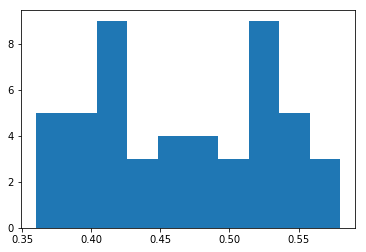

In [31]:
plt.hist(bootstrap_sample_means_home)

In [23]:
np.std(bootstrap_sample_means_home)

0.060058638013195075

In [25]:
bootstrap_sample_means_home.mean()

0.4663999999999999

In [27]:
#lower bound
np.percentile(a=bootstrap_sample_means_home, q=2.5)

0.3645

In [28]:
#upper bound
np.percentile(a=bootstrap_sample_means_home, q=97.5)

0.5754999999999999

#### Away Win Rate Results

In [22]:
bootstrap_sample_means_away

array([0.2 , 0.36, 0.28, 0.32, 0.3 , 0.24, 0.38, 0.28, 0.36, 0.32, 0.26,
       0.28, 0.26, 0.3 , 0.46, 0.22, 0.34, 0.26, 0.2 , 0.28, 0.16, 0.2 ,
       0.34, 0.14, 0.32, 0.3 , 0.28, 0.32, 0.28, 0.3 , 0.38, 0.26, 0.26,
       0.14, 0.3 , 0.32, 0.24, 0.32, 0.22, 0.2 , 0.32, 0.36, 0.34, 0.3 ,
       0.36, 0.3 , 0.34, 0.3 , 0.24, 0.24])

(array([ 3.,  4.,  2.,  9., 14.,  7.,  8.,  2.,  0.,  1.]),
 array([0.14 , 0.172, 0.204, 0.236, 0.268, 0.3  , 0.332, 0.364, 0.396,
        0.428, 0.46 ]),
 <a list of 10 Patch objects>)

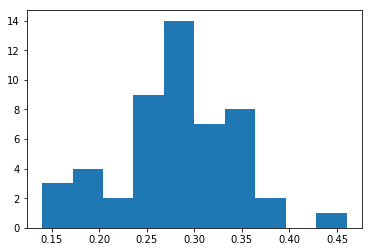

In [32]:
plt.hist(bootstrap_sample_means_away)

In [24]:
np.std(bootstrap_sample_means_away)

0.06325061264525428

In [26]:
bootstrap_sample_means_away.mean()

0.2856

In [29]:
#lower bound
np.percentile(a=bootstrap_sample_means_away, q=2.5)

0.14450000000000002

In [30]:
#upper bound
np.percentile(a=bootstrap_sample_means_away, q=97.5)

0.38